In [135]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [136]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping


In [137]:
energy = pd.read_csv("/Users/mhnguyetvu/workspace/RNN-Time-series/Energy consumption.csv") 
energy

,Time,Value
0,2010-01,62623.1960
1,2010-02,55850.2170
2,2010-03,57069.6450
3,2010-04,51282.6970
4,2010-05,54092.5900
...,...,...
152,2022-09,41031.7113
153,2022-10,45584.7710
154,2022-11,58841.7691
155,2022-12,66539.4901


In [138]:
energy

,Time,Value
0,2010-01,62623.1960
1,2010-02,55850.2170
2,2010-03,57069.6450
3,2010-04,51282.6970
4,2010-05,54092.5900
...,...,...
152,2022-09,41031.7113
153,2022-10,45584.7710
154,2022-11,58841.7691
155,2022-12,66539.4901


In [139]:
import datetime

In [140]:
### Monthly consumption
energy['Year'] = pd.to_datetime(energy['Time']).dt.year  # Extract the year from the 'Time' column

# Group by 'Year' and sum the 'Value' column
yearly_consumption = energy.groupby('Year', sort=False).agg({'Value':'sum'})


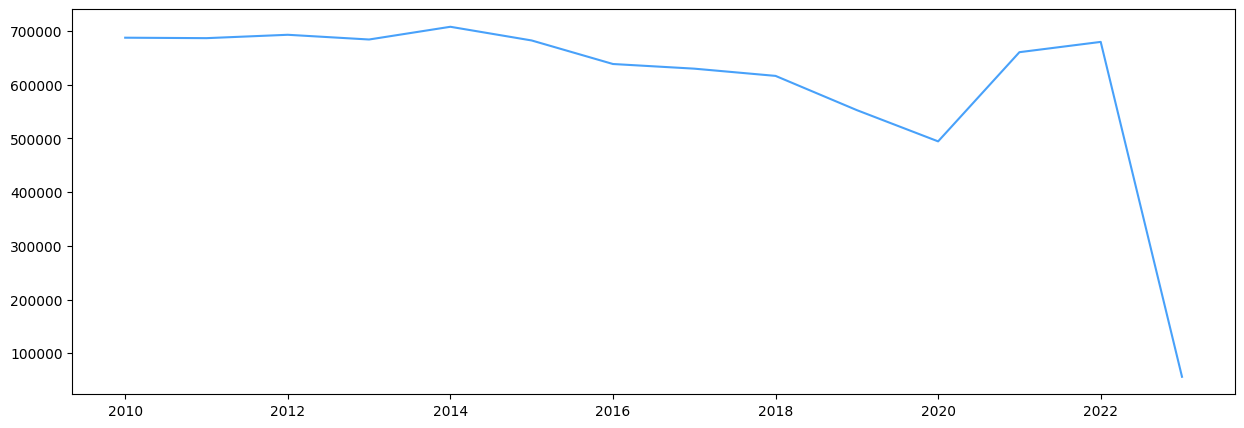

In [141]:

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(yearly_consumption, c='#48A1FA')
plt.show()
     

In [142]:
pip install datetime

Note: you may need to restart the kernel to use updated packages.


In [143]:
### parser time
from datetime import datetime
def parser(x):
  return datetime.strptime(x +'-01', '%Y-%m-%d')

In [144]:
energy['Time'] = energy['Time'].apply(parser)
energy

,Time,Value,Year
0,2010-01-01,62623.1960,2010
1,2010-02-01,55850.2170,2010
2,2010-03-01,57069.6450,2010
3,2010-04-01,51282.6970,2010
4,2010-05-01,54092.5900,2010
...,...,...,...
152,2022-09-01,41031.7113,2022
153,2022-10-01,45584.7710,2022
154,2022-11-01,58841.7691,2022
155,2022-12-01,66539.4901,2022


In [145]:
energy = energy.set_index('Time')

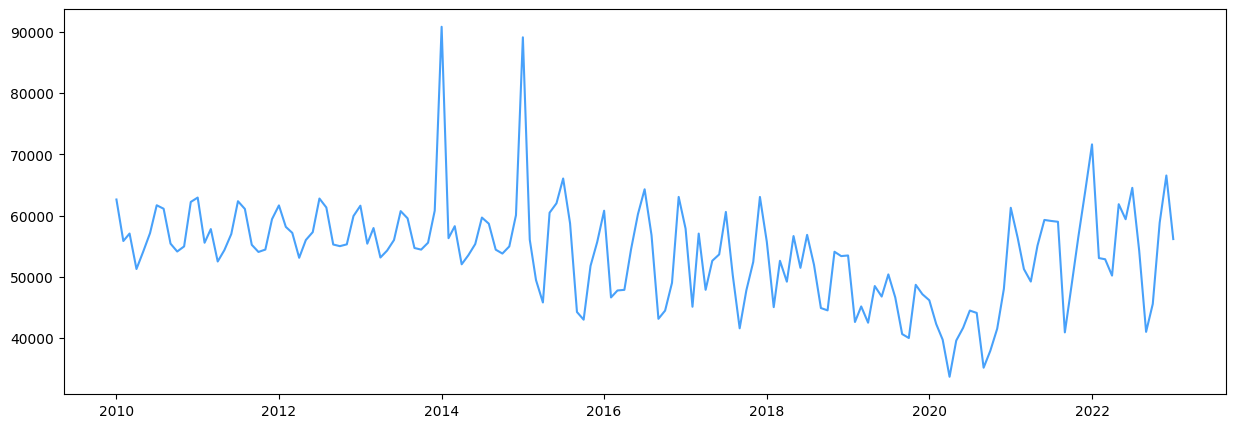

In [146]:
energy = energy.drop('Year',axis = 1)
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(energy, c='#48A1FA')
plt.show()

In [147]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [149]:
## test for stationary
from statsmodels.tsa.stattools import kpss

# Perform the KPSS test
kpss_stat, p_value, lags, critical_values = kpss(energy['Value'])

# Print the test results
print("KPSS Statistic:", kpss_stat)
print("p-value:", p_value)
print("Lags:", lags)
print("Critical Values:")
for key, value in critical_values.items():
    print(f"  {key}: {value}")

KPSS Statistic: 1.0760679853054154
p-value: 0.01
Lags: 5
Critical Values:
  10%: 0.347
  5%: 0.463
  2.5%: 0.574
  1%: 0.739


/var/folders/s_/qqll1tmd13j8cddntwdrs8bh0000gn/T/ipykernel_25461/427858443.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(energy['Value'])


Time series is non-stationary

In [150]:
import statsmodels.api as sm
from statsmodels.compat import lzip

Decomposition of time series into Trend, Seasonal, and Residuals components

In [153]:
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(x=energy, model = 'additive', period=12)
trend = ss_decomposition.trend
seasonal = ss_decomposition.seasonal
residual = ss_decomposition.resid

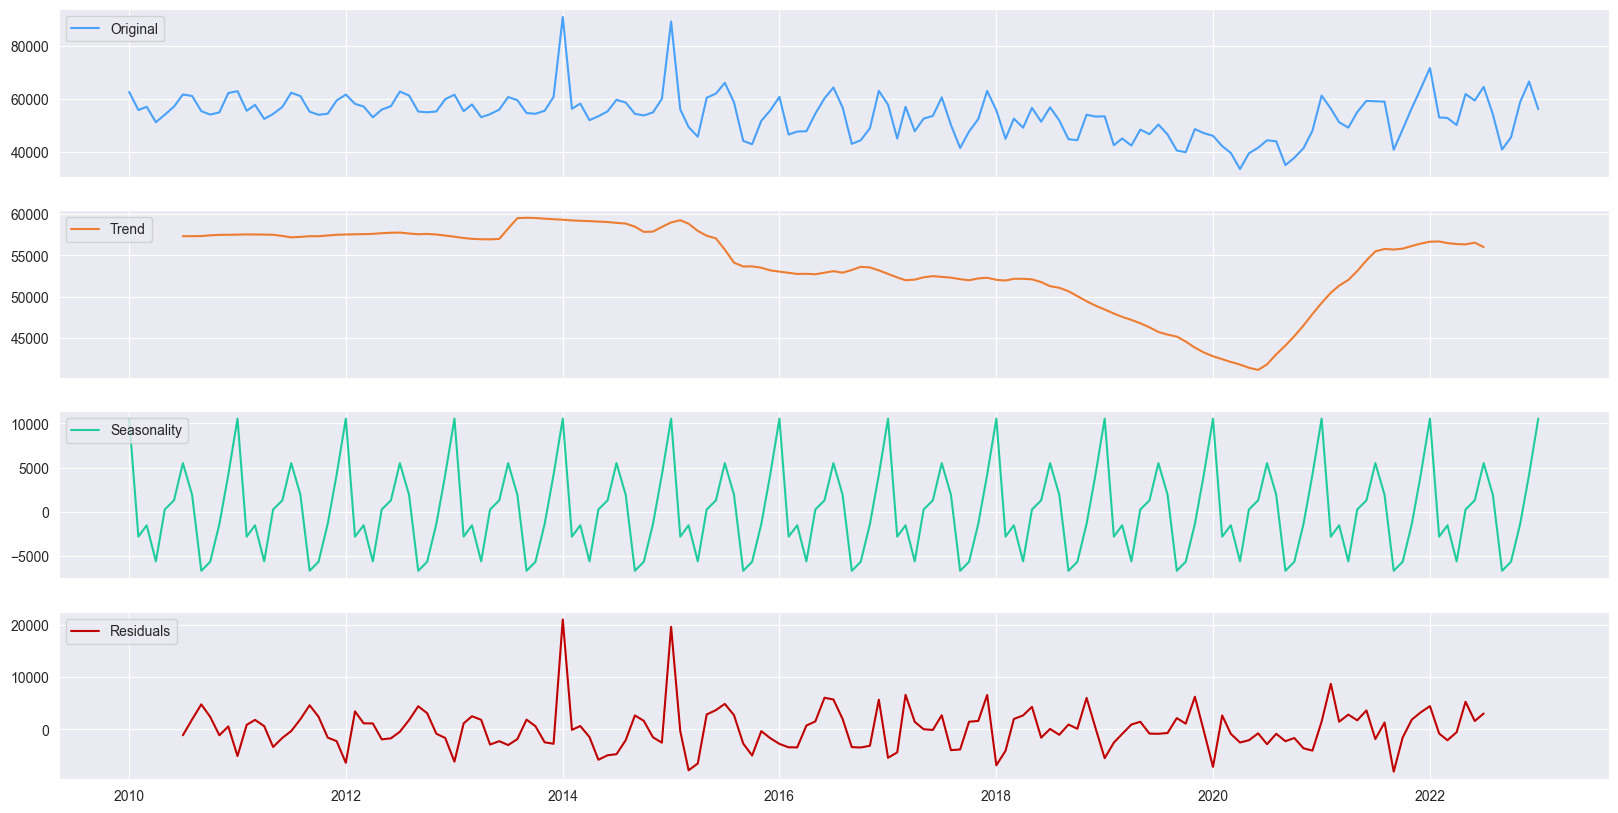

In [154]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(20,10))

axes[0].plot(energy.Value, label='Original', c="#48A1FA")
axes[0].legend(loc='upper left');

axes[1].plot(trend, label='Trend', c="#ED7D31")
axes[1].legend(loc='upper left');

axes[2].plot(seasonal, label='Seasonality', c="#1FCC9E")
axes[2].legend(loc='upper left');

axes[3].plot(residual, label='Residuals', c="#C00000")
axes[3].legend(loc='upper left');

Rollin mean and standar deviation plots

In [155]:

# define Dickey-Fuller Test (DFT) function
# Null is that unit root is present, rejection means likely stationary
import statsmodels.tsa.stattools as ts
def dftest(timeseries):
    dftest = ts.adfuller(timeseries,)
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value','Lags Used','Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(18, 7))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.grid()
    plt.show(block=False)
     

Test Statistic           -1.678125
p-value                   0.442417
Lags Used                12.000000
Observations Used       144.000000
Critical Value (1%)      -3.476598
Critical Value (5%)      -2.881829
Critical Value (10%)     -2.577589
dtype: float64


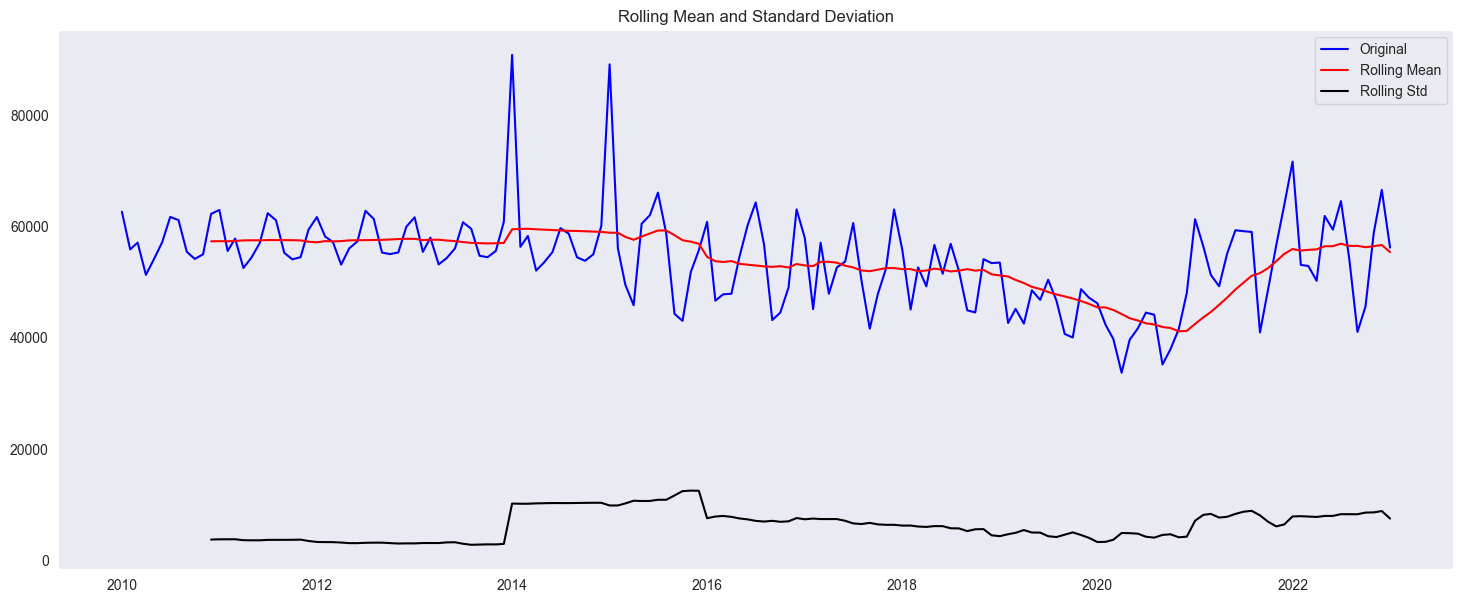

In [156]:

dftest(energy['Value'])

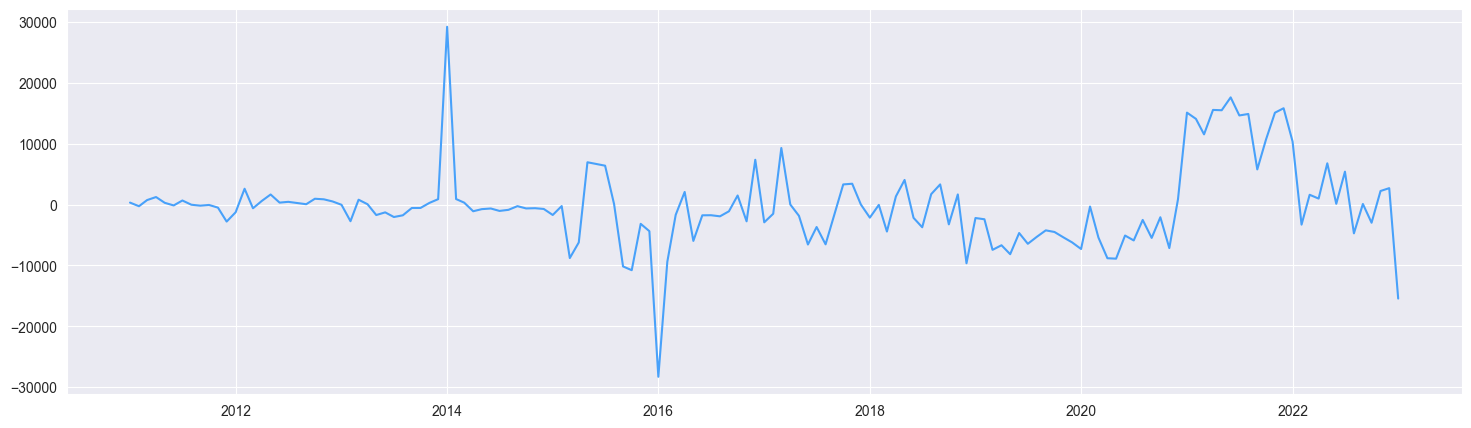

In [157]:
##Making Time Series statioanry by making necessary transformations
energy['seasonal_difference'] = energy['Value'].diff(12)
fig, ax = plt.subplots(figsize=(18,5))
ax.plot(energy.seasonal_difference, c='#48A1FA')
plt.show()


In [158]:
energy['seasonal_difference_positive'] = energy['seasonal_difference'] + 30000
energy.seasonal_difference_positive

Time
2010-01-01           NaN
2010-02-01           NaN
2010-03-01           NaN
2010-04-01           NaN
2010-05-01           NaN
                 ...    
2022-09-01    30087.1712
2022-10-01    27005.0170
2022-11-01    32219.5595
2022-12-01    32685.1687
2023-01-01    14552.3364
Name: seasonal_difference_positive, Length: 157, dtype: float64

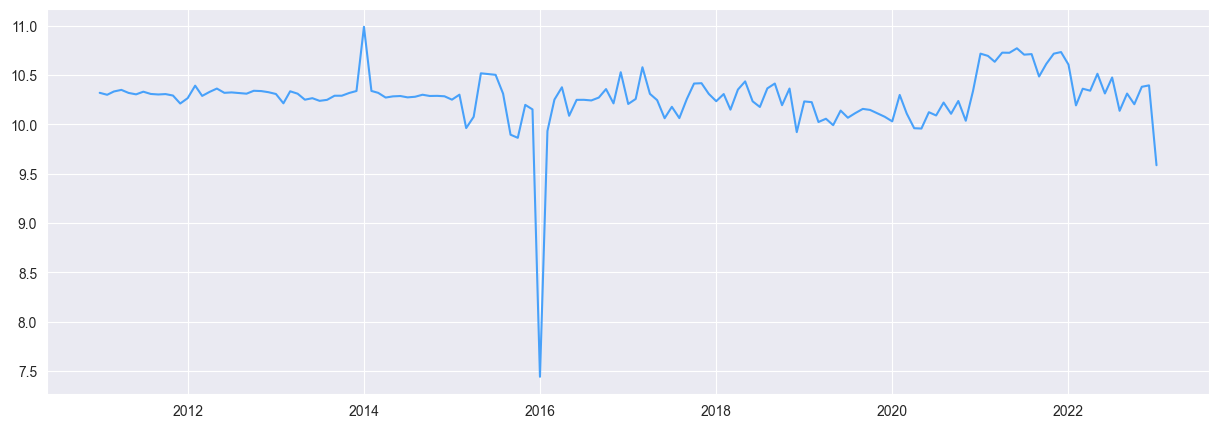

In [159]:
energy['log_transformed'] = np.log(energy.seasonal_difference_positive)
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(energy.log_transformed, c='#48A1FA')
plt.show()


In [160]:

# Perform the KPSS test
kpss_stat1, p_value1, lags1, critical_values1 = kpss(energy['log_transformed'][12:])

# Print the test results
print("KPSS Statistic:", kpss_stat1)
print("p-value:", p_value1)
print("Lags:", lags1)
print("Critical Values:")
for key, value in critical_values1.items():
    print(f"  {key}: {value}")
     

KPSS Statistic: 0.1424476379052172
p-value: 0.1
Lags: 6
Critical Values:
  10%: 0.347
  5%: 0.463
  2.5%: 0.574
  1%: 0.739


/var/folders/s_/qqll1tmd13j8cddntwdrs8bh0000gn/T/ipykernel_25461/285835329.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat1, p_value1, lags1, critical_values1 = kpss(energy['log_transformed'][12:])


In [162]:
##ADF test
from statsmodels.tsa.stattools import adfuller
adf1, pval1, usedlag1, nobs1, critical_vals1, icbest1 = adfuller(energy['log_transformed'][12:])
print('P value',pval1)
print(adf1)
print(icbest1)
print(usedlag1)
print(critical_vals1)
     

P value 0.004914033815606849
-3.6475723929498414
64.19361269189548
3
{'1%': -3.4776006742422374, '5%': -2.882265832283648, '10%': -2.5778219289774156}


In [163]:
const_array1 = np.ones_like(energy.log_transformed[12:])
reg_model1 = sm.OLS(energy.log_transformed[12:], const_array1).fit()

# Calculate the residuals
residuals1 = reg_model1.resid

bp_model1 = sm.OLS(residuals1**2, const_array1).fit()

# Perform the Breusch-Pagan test
bp_test1 = bp_model1.get_robustcov_results(cov_type='HC1')
test_statistic1 = bp_test1.bse[0]
p_value1 = bp_test1.pvalues[0]

# Print the test results
print("Breusch-Pagan Test Results:")
print("Test Statistic:", test_statistic1)
print("p-value:", p_value1)

Breusch-Pagan Test Results:
Test Statistic: 0.055284533519155805
p-value: 0.09114220052480682


In [165]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [166]:
from tabulate import tabulate

adf_pvalue = 0.004914033815606926
kpss_pvalue = 0.1
bp_pvalue = 0.0911422005248068

data = [
    ['ADF Test', adf_pvalue],
    ['KPSS Test', kpss_pvalue],
    ['Breusch-Pagan Test', bp_pvalue]
]

print(tabulate(data, headers=['Test', 'p-value'], tablefmt='fancy_grid'))


╒════════════════════╤════════════╕
│ Test               │    p-value │
╞════════════════════╪════════════╡
│ ADF Test           │ 0.00491403 │
├────────────────────┼────────────┤
│ KPSS Test          │ 0.1        │
├────────────────────┼────────────┤
│ Breusch-Pagan Test │ 0.0911422  │
╘════════════════════╧════════════╛


Decomposing the transformed time series

In [167]:
ss_decomposition1 = seasonal_decompose(x=energy.log_transformed[12:], model = 'additive', period=12)
trend1 = ss_decomposition1.trend
seasonal1 = ss_decomposition1.seasonal
residual1 = ss_decomposition1.resid

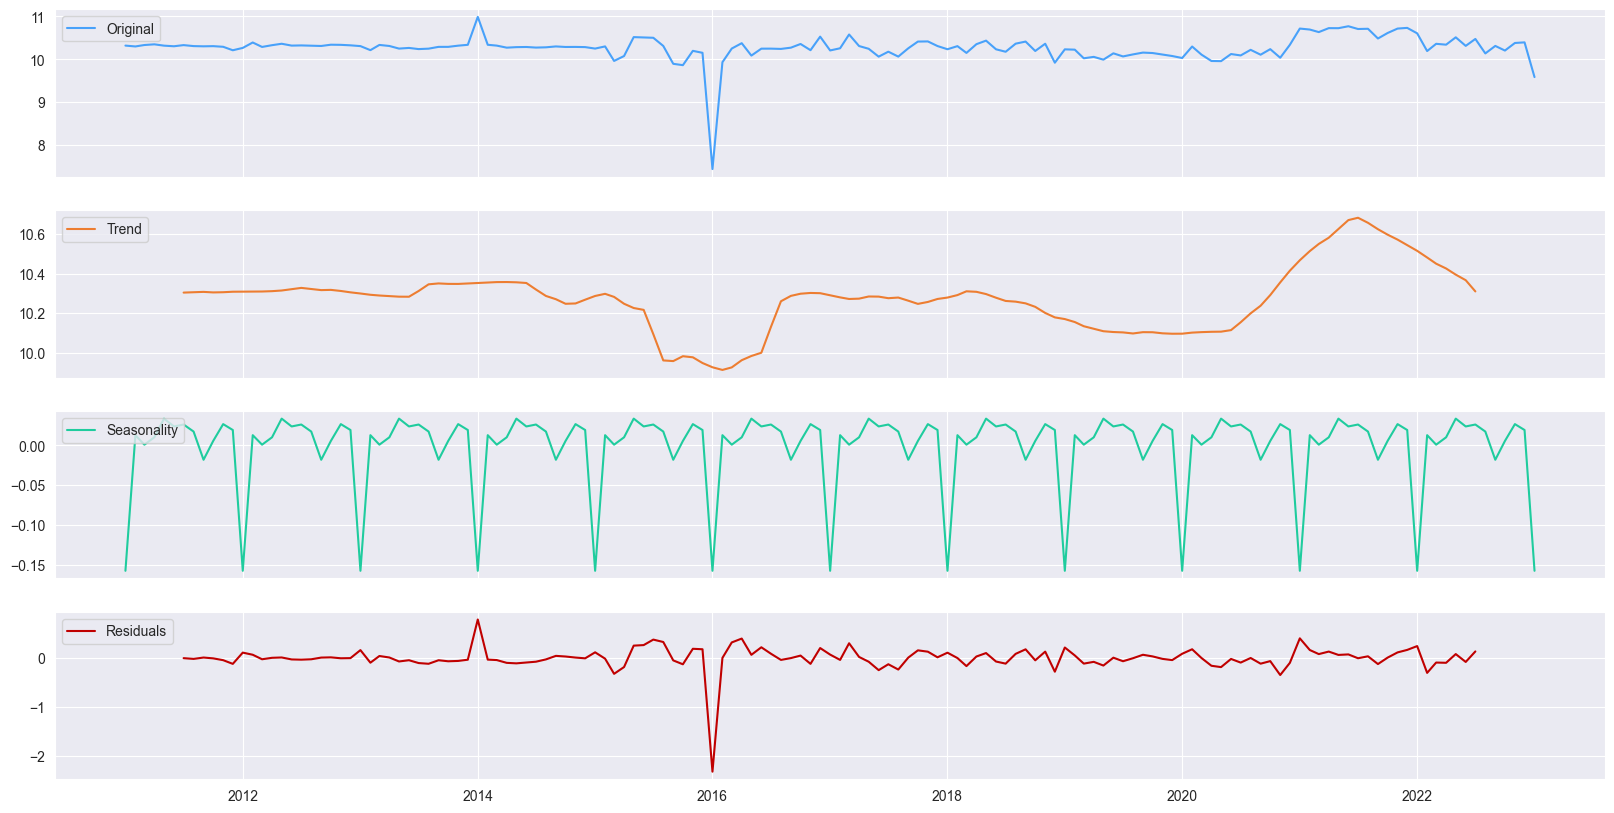

In [168]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(20,10))

axes[0].plot(energy.log_transformed[12:], label='Original', c="#48A1FA")
axes[0].legend(loc='upper left');

axes[1].plot(trend1, label='Trend', c="#ED7D31")
axes[1].legend(loc='upper left');

axes[2].plot(seasonal1, label='Seasonality', c="#1FCC9E")
axes[2].legend(loc='upper left');

axes[3].plot(residual1, label='Residuals', c="#C00000")
axes[3].legend(loc='upper left');

In [170]:
!pip install pmdarima
import pmdarima as pm

  Using cached Cython-3.0.10-py2.py3-none-any.whl.metadata (3.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.4/630.4 kB 2.1 MB/s eta 0:00:00a 0:00:01m
Using cached Cython-3.0.10-py2.py3-none-any.whl (1.2 MB)


In [174]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

# Split the data into training and testing sets
train_data = energy['log_transformed'][12:]

# Define the parameter ranges for grid search
p_range = range(0, 3)  # Autoregressive order
d_range = range(0, 2)  # Differencing order
q_range = range(0, 6)  # Moving average order
P_range = range(0, 3)  # Seasonal autoregressive order
D_range = range(0, 2)  # Seasonal differencing order
Q_range = range(0, 3)  # Seasonal moving average order
s = 12  # Seasonal period

# Perform grid search to find the best parameters
model = pm.auto_arima(train_data, start_p=1, start_q=1, max_p=5, max_q=5,
                      start_P=0, start_D=0, start_Q=0, max_P=5, max_D=5, max_Q=5,
                      seasonal=True, m=s, stepwise=True, suppress_warnings=True)

# Get the best model parameters
best_order = model.order
best_seasonal_order = model.seasonal_order

print("Best SARIMA order:", best_order)
print("Best seasonal order:", best_seasonal_order)

Best SARIMA order: (1, 0, 1)
Best seasonal order: (0, 0, 0, 12)


In [175]:
# fit SARIMA monthly based on helper plots
sarima = sm.tsa.statespace.SARIMAX(energy.log_transformed, 
                                order=(1,0,1), 
                                seasonal_order=(0,0,0,12), 
                                trend='c').fit()
sarima.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.64818D-01    |proj g|=  4.71079D-02

At iterate    5    f=  1.64668D-01    |proj g|=  1.65706D-02

At iterate   10    f=  1.64504D-01    |proj g|=  7.40545D-02

At iterate   15    f=  1.62264D-01    |proj g|=  3.29339D-01

At iterate   20    f=  1.60558D-01    |proj g|=  5.51185D-01

At iterate   25    f=  1.59239D-01    |proj g|=  1.40967D-01

At iterate   30    f=  1.58433D-01    |proj g|=  2.98827D-01

At iterate   35    f=  1.57035D-01    |proj g|=  3.38873D-01

At iterate   40    f=  1.56129D-01    |proj g|=  2.74880D-01

At iterate   45    f=  1.55742D-01    |proj g|=  2.65050D-01

At iterate   50    f=  1.55111D-01    |proj g|=  1.20877D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/mhnguyetvu/.pyenv/versions/3.9.6/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/mhnguyetvu/.pyenv/versions/3.9.6/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/mhnguyetvu/.pyenv/versions/3.9.6/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        log_transformed   No. Observations:                  157
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 -24.352
Date:                Tue, 02 Jul 2024   AIC                             56.705
Time:                        22:28:57   BIC                             68.930
Sample:                    01-01-2010   HQIC                            61.670
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.5795      1.685      1.531      0.126      -0.723       5.882
ar.L1          0.7487      0.164      4.559      0.000       0.427       1.071
ma.L1         -0.5078      0.207     -2.450      0.014      -0.914      -0.102
sigma2         0.0812      0.003     26.914      0.000       0.075       0.087
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             26343.91
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               3.80   Skew:                            -6.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        65.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [176]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

# Split the data into training and testing sets
train_data1, test_data1 = train_test_split(energy['log_transformed'][12:], test_size=0.2)

# Define the parameter ranges for grid search
p_range = range(0, 3)  # Autoregressive order
d_range = range(0, 2)  # Differencing order
q_range = range(0, 5)  # Moving average order
P_range = range(0, 3)  # Seasonal autoregressive order
D_range = range(0, 2)  # Seasonal differencing order
Q_range = range(0, 3)  # Seasonal moving average order
s = 12  # Seasonal period

# Perform grid search to find the best parameters
model1 = pm.auto_arima(train_data1, start_p=1, start_q=1, max_p=5, max_q=5,
                      start_P=0, start_D=0, start_Q=0, max_P=5, max_D=5, max_Q=5,
                      seasonal=True, m=s, stepwise=True, suppress_warnings=True)

# Get the best model parameters
best_order1 = model1.order
best_seasonal_order1 = model1.seasonal_order

print("Best SARIMA order:", best_order1)
print("Best seasonal order:", best_seasonal_order1)

Best SARIMA order: (1, 0, 0)
Best seasonal order: (0, 0, 0, 12)


In [177]:
# fit SARIMA monthly based on helper plots
sarima_1 = sm.tsa.statespace.SARIMAX(energy.log_transformed, 
                                order=(1,0,1), 
                                seasonal_order=(0,0,0,12), 
                                trend='c').fit()
sarima_1.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.64818D-01    |proj g|=  4.71079D-02

At iterate    5    f=  1.64668D-01    |proj g|=  1.65706D-02

At iterate   10    f=  1.64504D-01    |proj g|=  7.40545D-02

At iterate   15    f=  1.62264D-01    |proj g|=  3.29339D-01

At iterate   20    f=  1.60558D-01    |proj g|=  5.51185D-01

At iterate   25    f=  1.59239D-01    |proj g|=  1.40967D-01

At iterate   30    f=  1.58433D-01    |proj g|=  2.98827D-01

At iterate   35    f=  1.57035D-01    |proj g|=  3.38873D-01

At iterate   40    f=  1.56129D-01    |proj g|=  2.74880D-01

At iterate   45    f=  1.55742D-01    |proj g|=  2.65050D-01

At iterate   50    f=  1.55111D-01    |proj g|=  1.20877D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/mhnguyetvu/.pyenv/versions/3.9.6/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/mhnguyetvu/.pyenv/versions/3.9.6/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/mhnguyetvu/.pyenv/versions/3.9.6/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        log_transformed   No. Observations:                  157
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 -24.352
Date:                Tue, 02 Jul 2024   AIC                             56.705
Time:                        22:29:41   BIC                             68.930
Sample:                    01-01-2010   HQIC                            61.670
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.5795      1.685      1.531      0.126      -0.723       5.882
ar.L1          0.7487      0.164      4.559      0.000       0.427       1.071
ma.L1         -0.5078      0.207     -2.450      0.014      -0.914      -0.102
sigma2         0.0812      0.003     26.914      0.000       0.075       0.087
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             26343.91
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               3.80   Skew:                            -6.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        65.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [178]:
# fit SARIMA monthly based on helper plots
sarima_temp = sm.tsa.statespace.SARIMAX(energy.log_transformed, 
                                order=(1,0,0), 
                                seasonal_order=(2,0,0,12), 
                                trend='c').fit()
sarima_temp.summary()

/Users/mhnguyetvu/.pyenv/versions/3.9.6/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/mhnguyetvu/.pyenv/versions/3.9.6/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/mhnguyetvu/.pyenv/versions/3.9.6/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.69462D-01    |proj g|=  2.09147D-01

At iterate    5    f=  1.47289D-01    |proj g|=  1.03136D+00

At iterate   10    f=  1.42204D-01    |proj g|=  1.59890D-01

At iterate   15    f=  1.42011D-01    |proj g|=  1.06278D-01

At iterate   20    f=  1.41725D-01    |proj g|=  1.01886D-01

At iterate   25    f=  1.41715D-01    |proj g|=  4.14686D-02

At iterate   30    f=  1.40561D-01    |proj g|=  2.60497D-01

At iterate   35    f=  1.37087D-01    |proj g|=  6.52028D-01

At iterate   40    f=  1.34959D-01    |proj g|=  3.26721D-01

At iterate   45    f=  1.34500D-01    |proj g|=  5.68063D-02

At iterate   50    f=  1.34469D-01    |proj g|=  9.90349D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/mhnguyetvu/.pyenv/versions/3.9.6/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    log_transformed   No. Observations:                  157
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 12)   Log Likelihood                 -21.112
Date:                            Tue, 02 Jul 2024   AIC                             52.223
Time:                                    22:30:17   BIC                             67.504
Sample:                                01-01-2010   HQIC                            58.429
                                     - 01-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      8.7753      1.702      5.156      0.000       5.439      12.111
ar.L1          0.3111      0.055      5.612      0.000       0.202       0.420
ar.S.L12       0.0241      0.221      0.109      0.913      -0.409       0.457
ar.S.L24      -0.2655      0.036     -7.462      0.000      -0.335      -0.196
sigma2         0.0773      0.003     22.925      0.000       0.071       0.084
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):             20783.12
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               3.45   Skew:                            -5.84
Prob(H) (two-sided):                  0.00   Kurtosis:                        58.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [179]:
energy['tem_forecast'] = sarima.predict(start = 0, end= energy.shape[0])

In [180]:
energy['tem_forecast_2'] = np.exp(energy['tem_forecast'])

In [181]:
energy['tem_forecast_3'] = energy['tem_forecast_2'] - 30000

In [182]:
energy['Forecast'] = energy['tem_forecast_3'].shift(12) + energy['Value'].iloc[12:]

In [183]:
energy['tem_forecast_5'] = energy['tem_forecast_3'].shift(12) + energy['seasonal_difference']

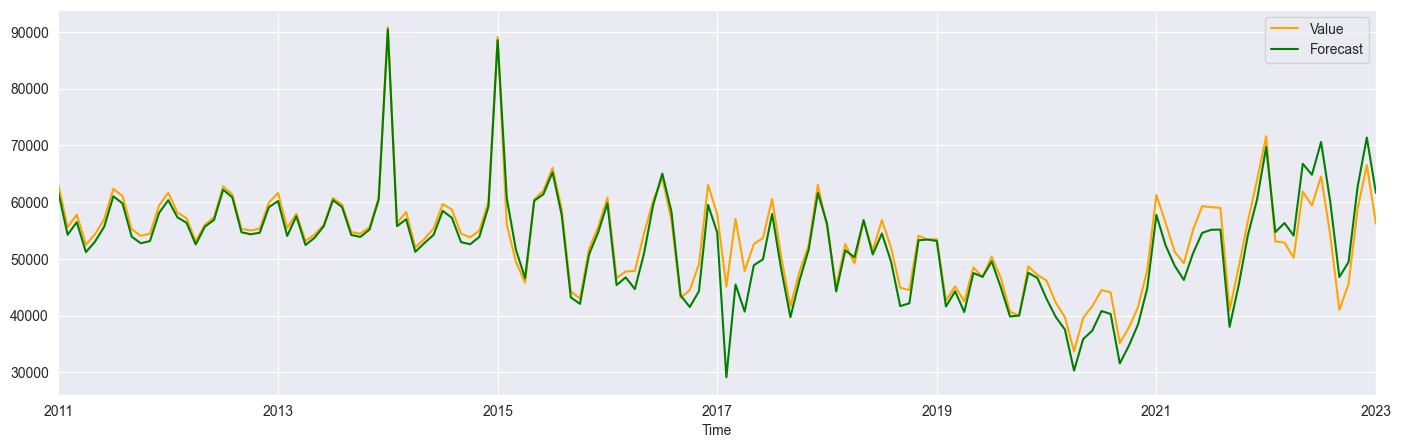

In [184]:
pd.plotting.register_matplotlib_converters()
energy[12:][['Value', 'Forecast']].plot(color = ('orange','g'), figsize = (17,5));

In [185]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(energy['Value'][12:], energy['Forecast'][12:])
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 2940.773565557581
